# EDA of Reuben's Tutoring Calendar Data 
### From ~ Oct 30, 2018 to ~ Feb 10, 2019

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('poster')
sns.set_style('darkgrid')
%matplotlib inline

In [3]:
df = pd.read_csv('dat/cleaned_tutoring_data.csv')

In [4]:
df.head()

,Weekday,Date,Duration,Student
0,Sunday,2018-10-28,2.0,KALE
1,Monday,2018-10-29,2.0,MORGAN
2,Monday,2018-10-29,1.0,HARMAN
3,Monday,2018-10-29,2.0,KEENAN
4,Tuesday,2018-10-30,1.0,HARMAN


### What days are the most popular for tutoring?

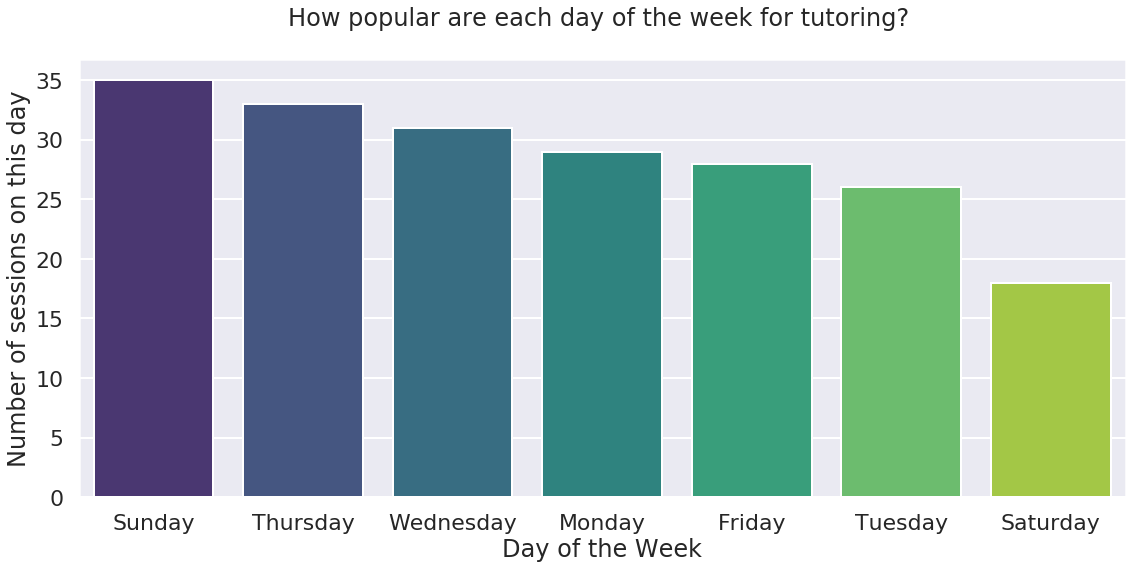

In [37]:
days = df['Weekday'].value_counts()

def make_dow_barplot(output_string=None):
    fig, ax = plt.subplots(figsize=[16,8])
    ax.set_title('How popular are each day of the week for tutoring? \n')
    ax.set_xlabel('Day of the Week')
    ax.set_ylabel('Number of sessions on this day')
    sns.barplot(x=days.index,y=days.values, ax=ax, palette='viridis')
    plt.tight_layout()
    
    if output_string:
        plt.savefig('/figs/'+output_string+'.png')
    
make_dow_barplot()

### Which students have I tutored the most? (Number of sessions and total hours)

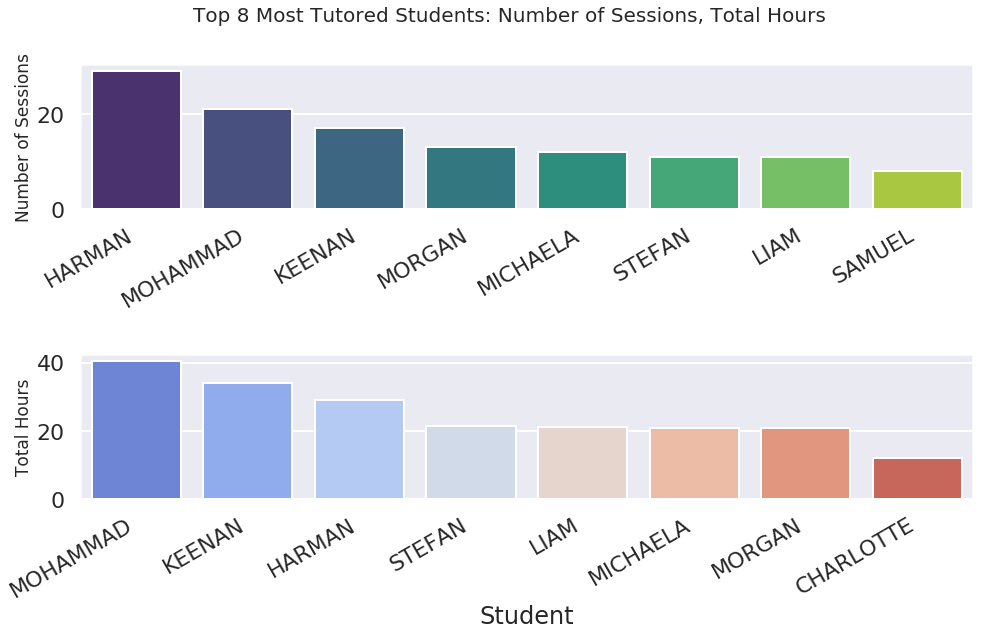

In [36]:
def make_student_barplot(output_string=None):
    # Get top 8 most frequent students by number of total sessions.
    studs = df['Student'].value_counts()[:8]
    # Get top 8 most frequent student by number of total hours.
    studs_hrs = df.groupby('Student').sum().sort_values(by='Duration',ascending=False)[:8]
    # Make figure.
    fig, ax = plt.subplots(nrows=2,ncols=1,figsize=[16,8])
    fig.suptitle('Top 8 Most Tutored Students: Number of Sessions, Total Hours \n',fontsize=20)
    # Do plot.
    sns.barplot(x=studs.index,y=studs.values, ax=ax[0], palette='viridis')
    sns.barplot(x=studs_hrs.index,y=studs_hrs['Duration'],ax=ax[1],palette='coolwarm')
    # Configure labels and ticks.
    ax[1].set_xlabel('Student')
    ax[0].set_ylabel('Number of Sessions',fontsize=17)
    ax[1].set_ylabel('Total Hours',fontsize=17)
    plt.subplots_adjust(hspace=1)
    plt.setp(ax[1].get_xticklabels(), rotation=30, ha='right')
    plt.setp(ax[0].get_xticklabels(), rotation=30, ha='right')
    
    if output_string:
        plt.savefig('/figs/'+output_string+'.png')
    
make_student_barplot()

### Cross-Tabulation: Students and Days of the Week Meeting Frequency

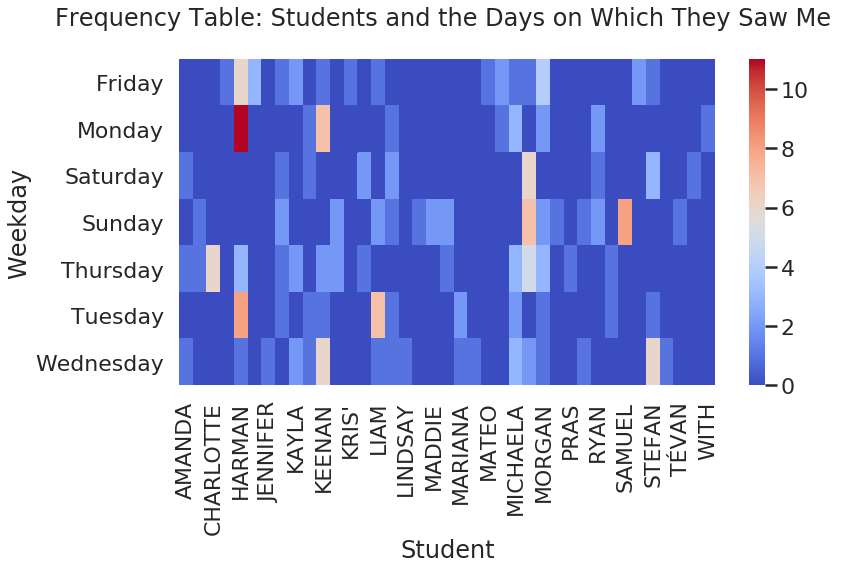

In [38]:
def make_student_weekday_crosstab(output_string=None):
    fig, ax = plt.subplots(figsize=[12,6])
    ax.set_title('Frequency Table: Students and the Days on Which They Saw Me \n')
    sns.heatmap(pd.crosstab(df['Weekday'],df['Student']),cmap='coolwarm')
    
    if output_string:
        plt.savefig('/figs/'+output_string+'.png')
    
make_student_weekday_crosstab()

### Tutoring Timeline

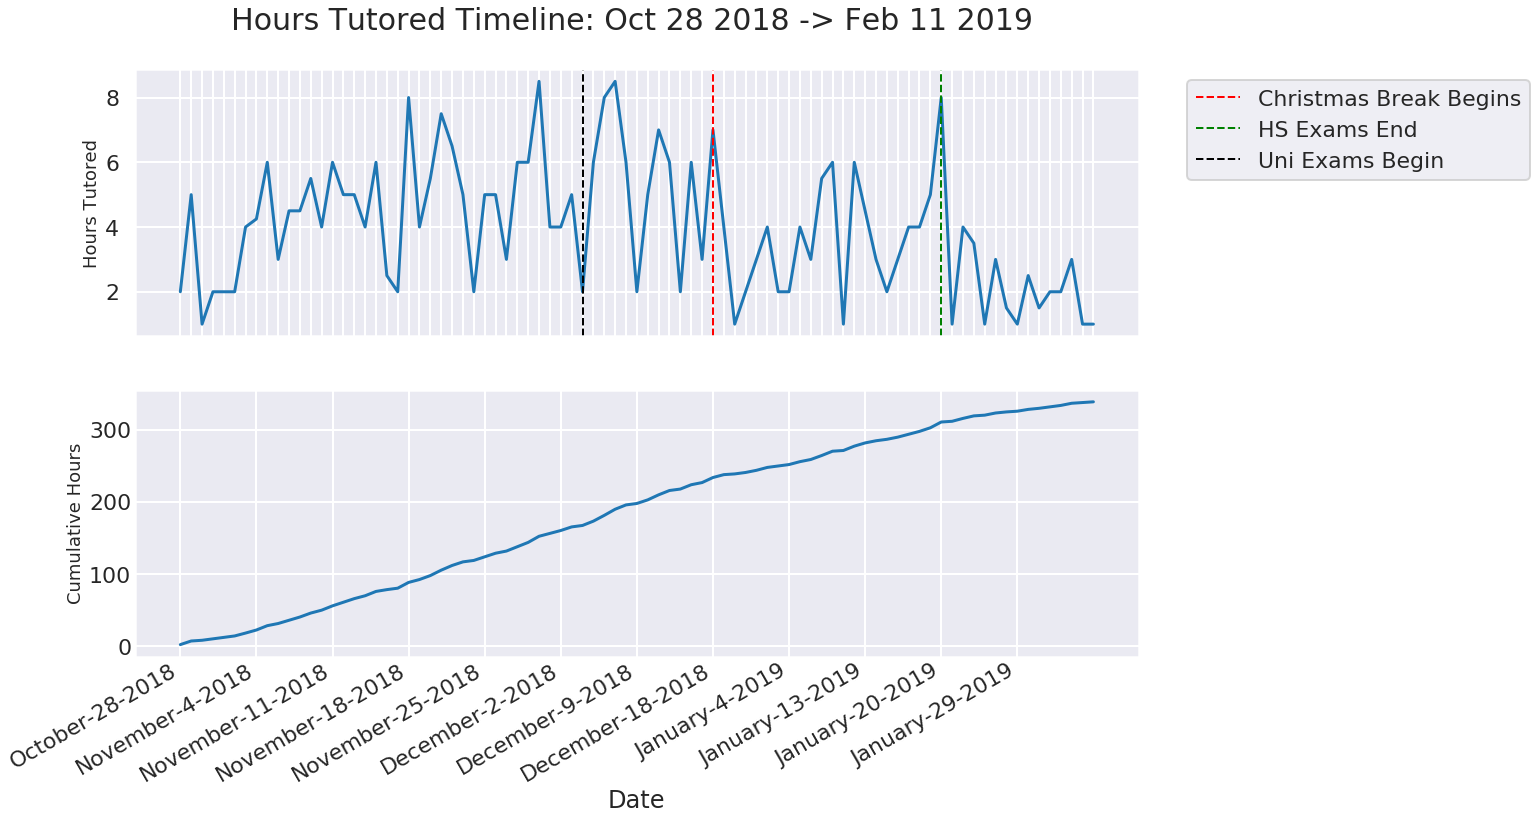

In [39]:
def make_tutoring_timeline(output_string=None):
    
    # Groupby Date.
    tmp = df.groupby('Date').sum()
    # Instantiate figure.
    fig, ax = plt.subplots(nrows=2,ncols=1,figsize=[18,12])
    fig.autofmt_xdate()
    # Make plots.
    sns.lineplot(x=tmp.index,y=tmp.Duration,ax=ax[0])
    sns.lineplot(x=tmp.index,y=tmp.Duration.cumsum(),ax=ax[1])
    
    # Make nice timestamps for plotting.
    def make_nice_dates(timestamp):
        return timestamp.month_name() + '-' + str(timestamp.day) + '-' + str(timestamp.year)
    timestamps = [make_nice_dates(pd.Timestamp(x)) for x in tmp.index] 
    
    # Configure axis titles and labels.
    ax[0].set_title('Hours Tutored Timeline: Oct 28 2018 -> Feb 11 2019 \n', fontsize=30)
    ax[0].set_ylabel('Hours Tutored',fontsize=18)
    ax[1].set_ylabel('Cumulative Hours', fontsize=18)
    ax[1].set_xticklabels(timestamps[0::7])
    ax[1].set_xticks(range(0,80,7))
    ax[1].tick_params(size=20,direction='in')
    
    # Draw some vertical lines indicating important dates.
    
    # Christmas break begins
    ax[0].axvline(x=timestamps.index('December-18-2018'),linestyle='--',linewidth=2,color='r',label='Christmas Break Begins')
    # High School Exams End
    ax[0].axvline(x=timestamps.index('January-20-2019'),linestyle='--',linewidth=2,color='g',label='HS Exams End')
    # University Exam Season Begins
    ax[0].axvline(x=timestamps.index('December-4-2018'),linestyle='--',linewidth=2,color='k',label='Uni Exams Begin')
    
    # Add legend.
    ax[0].legend(bbox_to_anchor=(1.4,1))
    
    if output_string:
        plt.savefig('/figs/'+output_string+'.png')
    
make_tutoring_timeline()